<a href="https://colab.research.google.com/github/mainarel/Numerical_Methods_6/blob/main/2_Heat_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np

aa = 1

a0, b0, a1, b1 = -1, 1, 1, 1

def u0(x,t):
  return np.cosh(x-t)

def f(x,t):
  return - np.sinh(x-t) - np.cosh(x-t)

#начальные условия
def phi(x):
  return np.cosh(x)

#граничные условия
def gamma1(t):
  return np.exp(t)

def gamma2(t):
  return np.exp(1-t)

xmin =  0
xmax = 1
h_cur = 0.05

tmin = 0
tmax = 1
tau_cur = 0.05


Прогонка:

In [17]:
def thomas_algorithm(a,b,c,f, n):
    A = np.zeros(n)
    B = np.zeros(n)
    y = np.zeros(n)

    A[0] = -c[0] / b[0]
    B[0] = f[0] / b[0]

    for i in range(1, n - 1):
        A[i] = -c[i] / (b[i] + a[i] * A[i - 1])
    A[-1] = 0
    for i in range(1, n):
        B[i] = (f[i] - a[i] * B[i - 1]) / (b[i] + a[i] * A[i - 1])

    y[-1] = B[-1]
    for i in reversed(range(n-1)):
        y[i] = B[i] + A[i] * y[i + 1]
    return y


1 порядок:

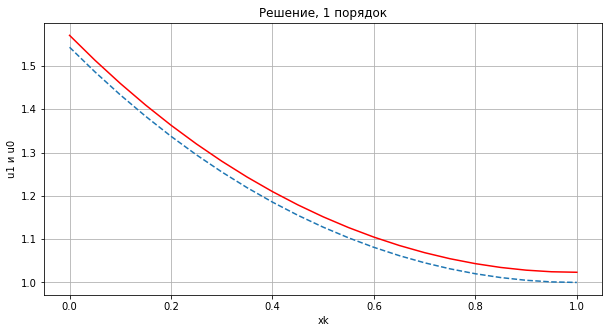

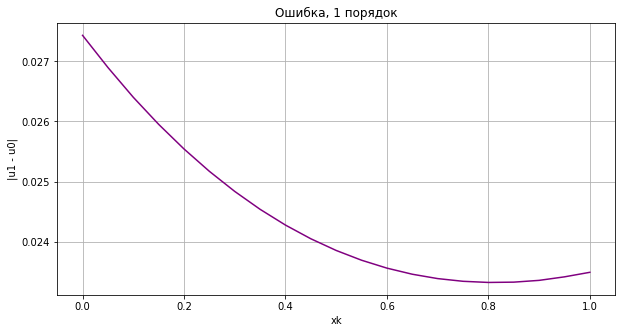

In [19]:
def p1(prev, tau, sigma,step, h):
    xk = np.arange(xmin, xmax+h, h)
    
    a = np.zeros(len(xk))
    b = np.zeros(len(xk))
    c = np.zeros(len(xk))
    d = np.zeros(len(xk))

    d[0] = gamma1(step*tau)
    d[-1] = gamma2(step*tau)

    b[0] = -(a0/h) + b0
    c[0] = a0/h

    b[-1] = (a1 / h) + b1
    a[-1] = -a1/h

    for i in range(1, len(xk)-1):
        a[i] = tau * aa**2* sigma / h**2
    for i in range(1, len(xk)-1):
        b[i] = -1 - 2 * tau * aa**2 * sigma/ h**2
    for i in range(1, len(xk)-1):
        c[i] = tau * aa**2* sigma / h**2
    for i in range(1, len(xk)-1):
        d[i] = - prev[i] -tau * f(xk[i], (step - 0.5)*tau) +(sigma-1)*(tau * aa**2 / h ** 2)*(prev[i+1] - 2*prev[i] + prev[i-1])

    return thomas_algorithm(a,b ,c ,d ,len(xk))


sigma = 1/2
xk_cur = np.arange(xmin, xmax + h_cur, h_cur)
tn_cur = np.arange(tmin, tmax + tau_cur , tau_cur)

yreal1 = [u0(xk_cur[k],tn_cur[-1]) for k in range(len(xk_cur))]
y_ = [phi(xk_cur[i]) for i in range(len(xk_cur))]
ypol1 = []
for step in range(1, len(tn_cur)):
    ypol1 = p1(y_, tau_cur, sigma, step, h_cur)
    y_ = ypol1.copy()

diff1 = [abs(yreal1[i] - ypol1[i]) for i in range(len(yreal1))]

plt.figure(figsize=(10,5))
plt.title("Решение, 1 порядок")
plt.xlabel("xk")
plt.ylabel("u1 и u0")
plt.grid()
plt.plot(xk_cur, ypol1, color='red')
plt.plot(xk_cur, yreal1 , linestyle="--")

plt.figure(figsize=(10,5))
plt.title("Ошибка, 1 порядок")
plt.xlabel("xk")
plt.ylabel("|u1 - u0|")
plt.grid()
plt.plot(xk_cur, diff1, color='purple')

2 порядок:

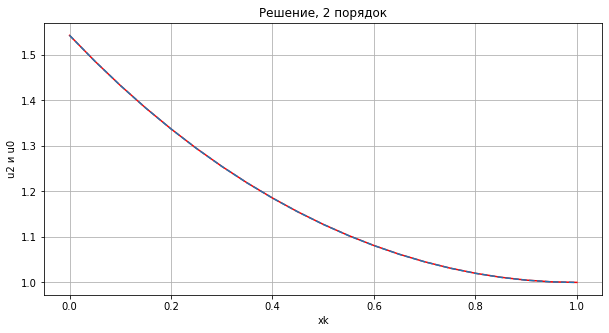

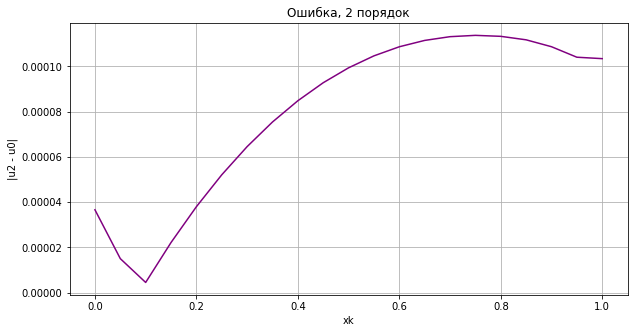

In [23]:
def p2(prev, tau, sigma, step, h):

    xk = np.arange(xmin, xmax+h, h)

    a = np.zeros(len(xk))
    b = np.zeros(len(xk))
    c = np.zeros(len(xk))
    d = np.zeros(len(xk))

    if a0 == 0:
        b[0] = b0
        d[0] = gamma1(step*tau)
    else:
        b[0] = 1 - aa ** 2 * tau / (h ** 2 * 2) * (-2 + b0 * 2 * h / a0)
        c[0] = - aa ** 2 * tau / h ** 2
        d[0] = prev[0]+aa**2*tau/(2*h**2)*(-gamma1(step*tau)*2*h/a0 + prev[1] - 2*prev[0]+prev[1] - (gamma1((step-1)*tau)-b0*prev[0])*2*h/a0) + tau*f(xk[0], (step - 0.5)*tau)

    if a1 == 0:
        b[-1] = b1
        d[-1] = gamma2(step*tau)
    else:
        d[-1] = prev[0]+aa**2*tau/(2*h**2)*(gamma2(step*tau)*2*h/a1 + prev[-2] - 2*prev[-1]+prev[-2] + (gamma2((step-1)*tau)-b1*prev[0])*2*h/a1) + tau*f(xk[-1], (step - 0.5)*tau)
        b[-1] = 1 - aa**2*tau/(h**2*2)*(-2 - b1*2*h/a1)
        a[-1] = - aa**2*tau/h**2

    for i in range(1, len(xk) - 1):
        a[i] = tau * aa ** 2 * sigma / h ** 2
    for i in range(1, len(xk) - 1):
        b[i] = -1 - 2 * tau * aa ** 2 * sigma / h ** 2
    for i in range(1, len(xk) - 1):
        c[i] = tau * aa ** 2 * sigma / h ** 2
    for i in range(1, len(xk) - 1):
        d[i] = - prev[i] - tau * f(xk[i], (step - 0.5) * tau) + (sigma - 1) * (tau * aa ** 2 / h ** 2) * (prev[i + 1] - 2 * prev[i] + prev[i - 1])

    return thomas_algorithm(a, b, c, d, len(xk))

y_ = [phi(xk_cur[i]) for i in range(len(xk_cur))]
ypol2 = []
for step in range(1, len(tn_cur)):
    ypol2 = p2(y_, tau_cur, sigma, step, h_cur)
    y_ = ypol2.copy()

diff1 = [abs(yreal1[i] - ypol2[i]) for i in range(len(yreal1))]

plt.figure(figsize=(10,5))
plt.title("Решение, 2 порядок")
plt.xlabel("xk")
plt.ylabel("u2 и u0")
plt.grid()
plt.plot(xk_cur, ypol2, color='red')
plt.plot(xk_cur, yreal1 , linestyle="--")

plt.figure(figsize=(10,5))
plt.title("Ошибка, 2 порядок")
plt.xlabel("xk")
plt.ylabel("|u2 - u0|")
plt.grid()
plt.plot(xk_cur, diff1, color='purple')

Зависимость ошибки от шага:

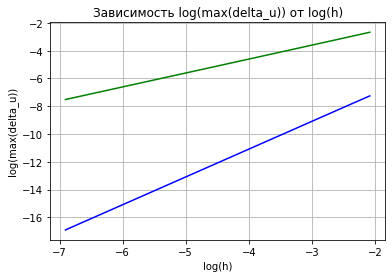

In [52]:
hrange =  [0.001, 0.0025 ,0.005, 0.025, 0.05, 0.1,  0.125 ]

error_1 = np.zeros(len(hrange))
error_2 = np.zeros(len(hrange))

for j in range(len(hrange)):
    hi = hrange[j]
    t = hi
    tn_h = np.arange(tmin, tmax+t, t)
    xk_h = np.arange(xmin, xmax+hi, hi)
    prev_1_ = [phi(xk_h[i]) for i in range(len(xk_h))]
    y_1, y_2 = np.zeros(len(xk_h)),  [0 for i in range(len(xk_h))]
    prev_2_ = [phi(xk_h[i]) for i in range(len(xk_h))]
     
    yreal = [u0(xk_h[k], tn_h[-1]) for k in range(len(xk_h))]
    for i in range(1, len(tn_h)):
        y_1, y_2  = p1(prev_1_, t, sigma, i,  hi), p2(prev_2_, t, sigma, i,  hi)
        prev_1_, prev_2_  = y_1.copy(),  y_2.copy()
         
    error_1[j] = np.log(max([abs(y_1[j] - yreal[j]) for j in range(len(yreal))]))
    error_2[j] = np.log(max([abs(y_2[j] - yreal[j]) for j in range(len(yreal))]))

plt.figure()
plt.title("Зависимость log(max(delta_u)) от log(h)")
plt.xlabel("log(h)")
plt.ylabel("log(max(delta_u))")
plt.grid()
plt.plot(np.log(hrange), error_1, color='green')
plt.plot(np.log(hrange), error_2, color='blue')

